In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [4]:
X = np.arange(0.0, 5.0, 0.1)

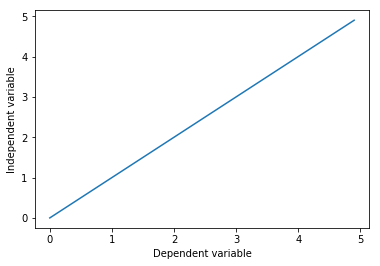

In [9]:
# adjust the slope and intercept
a = 1
b = 0

y = a * X + b

plt.plot(X, y)
plt.ylabel("Independent variable")
plt.xlabel("Dependent variable")
plt.show()

In [19]:
x_data = np.random.rand(100).astype(np.float32)

y_data = x_data *3 +2
y_data = np.vectorize(lambda y:y + np.random.normal(0.0,0.1))(y_data)

In [20]:
# linear regression with tensorflow

a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a*x_data + b

In [23]:
# find the loss
loss = tf.reduce_mean(tf.square(y-y_data))
print(loss)

Tensor("Mean_2:0", shape=(), dtype=float32)


In [24]:
# optimizer method
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [25]:
# training method
train = optimizer.minimize(loss)

In [26]:
# start
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [27]:
# start the optimization and run the graph
loss_values = []
train_data = []
for step in range (100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5==0:
        print(step,loss_val, a_val, b_val)
        train_data.append([a_val, b_val])
    

0 1407.9716 17.88099 26.481674
5 349.4376 10.762083 14.008579
10 86.75669 7.203777 7.801943
15 21.569317 5.4195814 4.7167115
20 5.390758 4.5195446 3.1861892
25 1.3740236 4.0603237 2.4299328
30 0.37541378 3.8210564 2.0591722
35 0.12588194 3.6917074 1.8802478
40 0.062348235 3.617451 1.7966954
45 0.045075826 3.570965 1.7604672
50 0.039381612 3.5386279 1.7476346
55 0.036652364 3.513643 1.7462838
60 0.034744848 3.492616 1.7504852
65 0.033121534 3.473845 1.7572905
70 0.031643767 3.4564729 1.7652369
75 0.03027226 3.440064 1.7736003
80 0.028992698 3.424392 1.7820255
85 0.027797246 3.409336 1.79034
90 0.026679944 3.3948274 1.7984629
95 0.025635608 3.380824 1.8063581


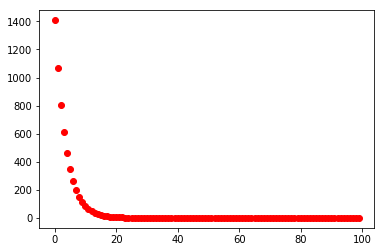

In [30]:
plt.plot(loss_values, 'ro')

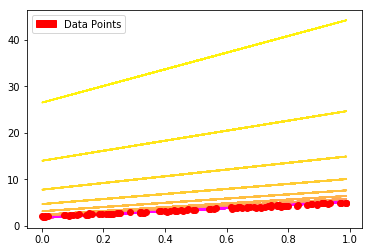

In [33]:
# how coefficient and y-intercept has changed
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

In [65]:
# 2. another example
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [66]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [67]:
# tensorflow graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# set model weights
W = tf.Variable(np.random.randn(), name ="weight")
b = tf.Variable(np.random.randn(), name = "bias")

In [68]:
# construct a linear model
pred = tf.add(tf.multiply(W,X), b)

In [69]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# initialize the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.201050177 W= 0.44652665 b= -0.61525583
Epoch: 0100 cost= 0.186715841 W= 0.43481418 b= -0.53099716
Epoch: 0150 cost= 0.174036711 W= 0.42379823 b= -0.4517489
Epoch: 0200 cost= 0.162821874 W= 0.4134374 b= -0.377214
Epoch: 0250 cost= 0.152902246 W= 0.40369284 b= -0.3071123
Epoch: 0300 cost= 0.144128278 W= 0.3945278 b= -0.24118002
Epoch: 0350 cost= 0.136367679 W= 0.38590792 b= -0.17916887
Epoch: 0400 cost= 0.129503459 W= 0.37780058 b= -0.12084565
Epoch: 0450 cost= 0.123432145 W= 0.37017554 b= -0.06599145
Epoch: 0500 cost= 0.118062191 W= 0.36300397 b= -0.014399611
Epoch: 0550 cost= 0.113312587 W= 0.3562589 b= 0.03412379
Epoch: 0600 cost= 0.109111696 W= 0.349915 b= 0.0797613
Epoch: 0650 cost= 0.105396166 W= 0.3439484 b= 0.12268451
Epoch: 0700 cost= 0.102109961 W= 0.3383367 b= 0.16305493
Epoch: 0750 cost= 0.099203505 W= 0.33305874 b= 0.20102412
Epoch: 0800 cost= 0.096632905 W= 0.3280946 b= 0.2367355
Epoch: 0850 cost= 0.094359405 W= 0.32342583 b= 0.27032262
Epoch: 0900 cost=

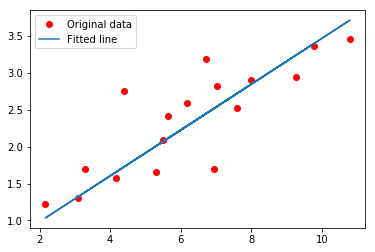

In [76]:
# start
with tf.Session() as sess:
    sess.run(init)
    
    #fit all training data
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()